In [355]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import division

In [356]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [357]:
mapping = pd.read_csv("mapping.csv")
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
category_list                              687 non-null object
Automotive & Sports                        688 non-null int64
Blanks                                     688 non-null int64
Cleantech / Semiconductors                 688 non-null int64
Entertainment                              688 non-null int64
Health                                     688 non-null int64
Manufacturing                              688 non-null int64
News, Search and Messaging                 688 non-null int64
Others                                     688 non-null int64
Social, Finance, Analytics, Advertising    688 non-null int64
dtypes: int64(9), object(1)
memory usage: 51.1+ KB


In [358]:
mapping.head(10)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1


In [359]:
rounds2 = pd.read_csv("rounds2.csv")
rounds2.head(25)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0
7,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
9,/ORGANIZATION/0XDATA,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0


In [360]:
rounds2.funding_round_type.value_counts()

venture                  55494
seed                     30524
debt_financing            6895
angel                     6094
undisclosed               4897
equity_crowdfunding       3257
private_equity            2285
grant                     2200
convertible_note          1817
post_ipo_equity            638
product_crowdfunding       410
non_equity_assistance      191
post_ipo_debt              152
secondary_market            95
Name: funding_round_type, dtype: int64

In [361]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 3.1+ MB


In [362]:
companies = pd.read_csv("companies.txt", sep="\t", encoding='iso-8859-1')
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [363]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 2.5+ MB


In [364]:
companies['permalink'].head(5) 


0                    /Organization/-Fame
1                 /Organization/-Qounter
2    /Organization/-The-One-Of-Them-Inc-
3                  /Organization/0-6-Com
4         /Organization/004-Technologies
Name: permalink, dtype: object

In [365]:
companies['permalink'].nunique()

66368

In [366]:
rounds2['company_permalink'].nunique()

90247

In [367]:
companies['permalink']= companies['permalink'].str.lower()
companies['permalink'].head()

0                    /organization/-fame
1                 /organization/-qounter
2    /organization/-the-one-of-them-inc-
3                  /organization/0-6-com
4         /organization/004-technologies
Name: permalink, dtype: object

In [368]:
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()
rounds2['company_permalink'].head()

0                    /organization/-fame
1                 /organization/-qounter
2                 /organization/-qounter
3    /organization/-the-one-of-them-inc-
4                  /organization/0-6-com
Name: company_permalink, dtype: object

In [369]:
#Merge to form master_frame
master_frame = rounds2.merge(companies, left_on='company_permalink', right_on='permalink', how='inner')
master_frame.head(25)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011


In [370]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114875 entries, 0 to 114874
Data columns (total 16 columns):
company_permalink          114875 non-null object
funding_round_permalink    114875 non-null object
funding_round_type         114875 non-null object
funding_round_code         31132 non-null object
funded_at                  114875 non-null object
raised_amount_usd          94915 non-null float64
permalink                  114875 non-null object
name                       114874 non-null object
homepage_url               108749 non-null object
category_list              111488 non-null object
status                     114875 non-null object
country_code               106238 non-null object
state_code                 103972 non-null object
region                     104749 non-null object
city                       104752 non-null object
founded_at                 94387 non-null object
dtypes: float64(1), object(15)
memory usage: 8.3+ MB


In [371]:
master_frame['funding_round_type'].value_counts()

venture                  55478
seed                     30491
debt_financing            6895
angel                     6091
undisclosed               4892
equity_crowdfunding       3252
private_equity            2284
grant                     2194
convertible_note          1812
post_ipo_equity            638
product_crowdfunding       410
non_equity_assistance      191
post_ipo_debt              152
secondary_market            95
Name: funding_round_type, dtype: int64

In [372]:
avg_fund = master_frame.groupby(['funding_round_type'])['raised_amount_usd'].mean()
avg_fund

funding_round_type
angel                    9.588918e+05
convertible_note         1.457327e+06
debt_financing           1.704353e+07
equity_crowdfunding      5.391133e+05
grant                    4.312660e+06
non_equity_assistance    4.112031e+05
post_ipo_debt            1.687046e+08
post_ipo_equity          8.218249e+07
private_equity           7.334146e+07
product_crowdfunding     1.363131e+06
secondary_market         7.964963e+07
seed                     7.198925e+05
undisclosed              1.925276e+07
venture                  1.174943e+07
Name: raised_amount_usd, dtype: float64

In [373]:
df2= master_frame[master_frame['funding_round_type']=='venture']
df2.head(25)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012


In [374]:
df2=df2.sort_values(by=['raised_amount_usd'], ascending=False)
df2.head(9)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
37544,/organization/freescale,/funding-round/a1495c088d886c8a4f4ce74403b77385,venture,NaN,21-10-2006,1.760000e+10,/organization/freescale,Freescale Semiconductor,http://www.freescale.com,Semiconductors,ipo,USA,TX,Austin,Austin,01-01-1953
60162,/organization/mediavast,/funding-round/07e345b61646adffc65946de6a1c88d9,venture,B,30-06-2003,4.700000e+09,/organization/mediavast,MediaVast,NaN,Advertising|Broadcasting|Content,acquired,USA,NY,New York City,New York,01-01-1999
104103,/organization/uber,/funding-round/1fa1e079dd45f9d615ce1469ed9090fb,venture,E,04-12-2014,1.200000e+09,/organization/uber,Uber,http://www.uber.com,Automotive|Design|Limousines|Public Transporta...,operating,USA,CA,SF Bay Area,San Francisco,01-03-2009
104110,/organization/uber,/funding-round/7a617d3521e9a71816c8d5cbcd4c49b0,venture,D,06-06-2014,1.200000e+09,/organization/uber,Uber,http://www.uber.com,Automotive|Design|Limousines|Public Transporta...,operating,USA,CA,SF Bay Area,San Francisco,01-03-2009
112103,/organization/xiaomi,/funding-round/0022fc712b8a48fc6b7341c6aa3b42a5,venture,E,22-12-2014,1.100000e+09,/organization/xiaomi,Xiaomi,http://www.mi.com,Consumer Electronics|Mobile,operating,CHN,22,Beijing,Beijing,04-04-2010
92987,/organization/space-exploration-technologies,/funding-round/3cbfa3a38fe9a74b04f6eaae8b5bc478,venture,E,20-01-2015,1.000000e+09,/organization/space-exploration-technologies,Space Exploration Technologies,http://www.spacex.com,Aerospace|Space Travel,operating,USA,CA,Los Angeles,Hawthorne,01-01-2002
104106,/organization/uber,/funding-round/2fd6f840728c42adee151fc1f1bf218e,venture,E,18-02-2015,1.000000e+09,/organization/uber,Uber,http://www.uber.com,Automotive|Design|Limousines|Public Transporta...,operating,USA,CA,SF Bay Area,San Francisco,01-03-2009
104113,/organization/uber,/funding-round/c738765257ab10e721f1a02d5af54681,venture,F,31-07-2015,1.000000e+09,/organization/uber,Uber,http://www.uber.com,Automotive|Design|Limousines|Public Transporta...,operating,USA,CA,SF Bay Area,San Francisco,01-03-2009
36377,/organization/flipkart,/funding-round/af6ac1c9d2f3050fd5e1530be3b9565f,venture,G,29-07-2014,1.000000e+09,/organization/flipkart,Flipkart,http://www.flipkart.com,E-Commerce|Online Shopping,operating,IND,19,Bangalore,Bangalore,01-09-2007


In [375]:
top9 = df2.groupby(['country_code'])['raised_amount_usd'].sum().nlargest(9)
top9


country_code
USA    4.225108e+11
CHN    3.983542e+10
GBR    2.024563e+10
IND    1.439186e+10
CAN    9.583332e+09
FRA    7.241142e+09
ISR    6.907515e+09
DEU    6.345560e+09
JPN    3.363677e+09
Name: raised_amount_usd, dtype: float64

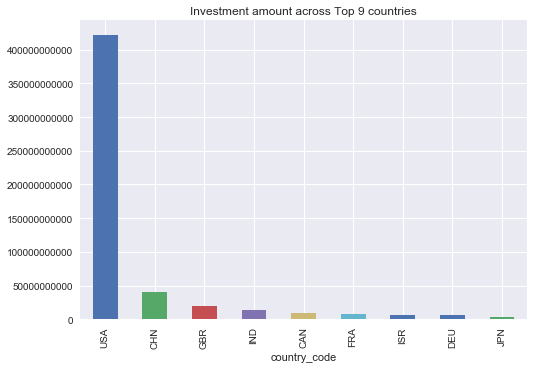

In [376]:
#PLOT 2
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
ax=plt.gca()
top9.plot(x='Countries', y='Funding amount(USD)', kind='bar', title='Investment amount across Top 9 countries',ax=ax )
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

In [377]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55478 entries, 37544 to 114834
Data columns (total 16 columns):
company_permalink          55478 non-null object
funding_round_permalink    55478 non-null object
funding_round_type         55478 non-null object
funding_round_code         30977 non-null object
funded_at                  55478 non-null object
raised_amount_usd          50219 non-null float64
permalink                  55478 non-null object
name                       55478 non-null object
homepage_url               52534 non-null object
category_list              54353 non-null object
status                     55478 non-null object
country_code               52612 non-null object
state_code                 51692 non-null object
region                     51933 non-null object
city                       51933 non-null object
founded_at                 44293 non-null object
dtypes: float64(1), object(15)
memory usage: 4.0+ MB


In [378]:
master_frame['category_list'][0]
master_frame['primary']=np.nan
master_frame['primary']=master_frame['category_list'].str.split(pat='|', n=1, expand=True)
master_frame.head(25)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,Apps
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,Curated Web
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,Software
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,Games
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,Biotechnology
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,Biotechnology
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics


In [379]:
#A mapping file that maps dummies
mapping_1= mapping.melt(id_vars=['category_list'])
mapping_1=mapping_1[mapping_1['value']==1]
mapping_1.head()

,category_list,variable,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1


In [380]:
#Final master_frame with the primary and main_sector data
master_frame = master_frame.merge(mapping_1, left_on='primary', right_on='category_list', how='left' )
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114875 entries, 0 to 114874
Data columns (total 20 columns):
company_permalink          114875 non-null object
funding_round_permalink    114875 non-null object
funding_round_type         114875 non-null object
funding_round_code         31132 non-null object
funded_at                  114875 non-null object
raised_amount_usd          94915 non-null float64
permalink                  114875 non-null object
name                       114874 non-null object
homepage_url               108749 non-null object
category_list_x            111488 non-null object
status                     114875 non-null object
country_code               106238 non-null object
state_code                 103972 non-null object
region                     104749 non-null object
city                       104752 non-null object
founded_at                 94387 non-null object
primary                    111488 non-null object
category_list_y            103348 non-nul

In [381]:
#Filtering for data where investment type is venture 
venture=master_frame[(master_frame['funding_round_type']=='venture')]

#Created D1,D2,D3 dataframes
D1=venture[(venture['country_code']=='USA') & (venture['raised_amount_usd'] >= float(5000000)) & (venture['raised_amount_usd'] <= float(15000000))]
D2=venture[(venture['country_code']=='GBR') & (venture['raised_amount_usd'] >= float(5000000)) & (venture['raised_amount_usd'] <= float(15000000))  ] 
D3=venture[(venture['country_code']=='IND') & (venture['raised_amount_usd'] >= float(5000000)) & (venture['raised_amount_usd'] <= float(15000000)) ] 

In [382]:
#Count the total number of investment
count_invest_D1 = D1['raised_amount_usd'].count()
count_invest_D2 = D2['raised_amount_usd'].count()
count_invest_D3 = D3['raised_amount_usd'].count()
print(count_invest_D1, count_invest_D2, count_invest_D3  )

(12150, 628, 330)


In [383]:
#D1 top 3 sectors
sec_name_D1= D1.groupby(['variable'])['variable'].count().nlargest(3)
sec_name_D1

variable
Others                                     2923
Cleantech / Semiconductors                 2297
Social, Finance, Analytics, Advertising    1912
Name: variable, dtype: int64

In [384]:
#D2 top 3 sectors
sec_name_D2= D2.groupby(['variable'])['variable'].count().nlargest(3)
sec_name_D2

variable
Others                                     143
Cleantech / Semiconductors                 127
Social, Finance, Analytics, Advertising     98
Name: variable, dtype: int64

In [385]:
#D3 top 3 sectors
sec_name_D3= D3.groupby(['variable'])['variable'].count().nlargest(3)
sec_name_D3

variable
Others                        109
News, Search and Messaging     52
Entertainment                  33
Name: variable, dtype: int64

In [386]:
#Highest Investment D1
q= D1.groupby(['name','variable'])['raised_amount_usd'].sum().nlargest(10)
q

name                   variable                               
Airspan Networks       News, Search and Messaging                 81769000.0
Biodesix               Cleantech / Semiconductors                 75300000.0
Avnera                 Entertainment                              71062970.0
Tigo Energy            Cleantech / Semiconductors                 68739496.0
EndoGastric Solutions  Health                                     67896724.0
Virtustream            Others                                     64300000.0
Intacct                Social, Finance, Analytics, Advertising    61800000.0
ForSight Labs          Cleantech / Semiconductors                 61300001.0
Lotame                 Social, Finance, Analytics, Advertising    59700000.0
ChoiceStream           Social, Finance, Analytics, Advertising    58300000.0
Name: raised_amount_usd, dtype: float64

In [387]:
#Highest Investment D2
q= D2.groupby(['name','variable'])['raised_amount_usd'].sum().nlargest(10)
q

name                    variable                               
GreenRoad Technologies  Automotive & Sports                        52500000.0
Celltick Technologies   Social, Finance, Analytics, Advertising    37500000.0
Electric Cloud          Others                                     37000000.0
Ubiquisys               News, Search and Messaging                 37000000.0
SenSage                 Others                                     36250000.0
brylle                  News, Search and Messaging                 36000000.0
EUSA Pharma             Cleantech / Semiconductors                 35600000.0
Autoquake               Automotive & Sports                        35557140.0
myThings                Social, Finance, Analytics, Advertising    34000000.0
Enigmatec               Others                                     32500000.0
Name: raised_amount_usd, dtype: float64

In [388]:
#Highest Investment D3
q= D3.groupby(['name','variable'])['raised_amount_usd'].sum().nlargest(10)
q

name                variable                               
Azure Power         Cleantech / Semiconductors                 47200000.0
FirstCry.com        Others                                     39000000.0
Myntra              Others                                     38000000.0
GupShup             News, Search and Messaging                 33000000.0
CommonFloor         Others                                     32900000.0
Perfint Healthcare  Cleantech / Semiconductors                 29200000.0
Komli Media         Social, Finance, Analytics, Advertising    28000000.0
MakeMyTrip.com      Automotive & Sports                        28000000.0
Pepperfry.com       Others                                     28000000.0
ItzCash Card Ltd.   Others                                     25000000.0
Name: raised_amount_usd, dtype: float64

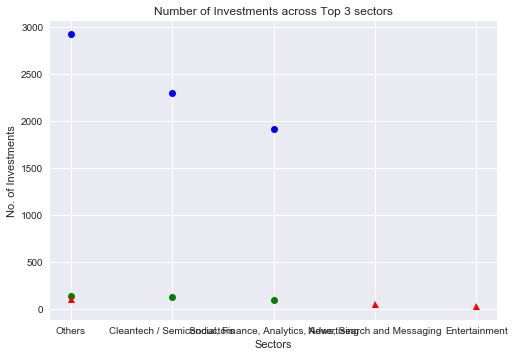

In [390]:
#PLOT 3
fig, ax = plt.subplots()

ax.plot(sec_name_D1, 'bo')
ax.plot(sec_name_D2, 'go')
ax.plot(sec_name_D3, 'r^')
ax.set(xlabel='Sectors', ylabel='No. of Investments',
       title='Number of Investments across Top 3 sectors' )
#ax.grid()

#fig.savefig("test.png")
plt.show()

In [414]:
venture['raised_amount_usd'].sum()*100/total_data

59.59938907471428

In [393]:
#TOTAL AMOUNT OF INVESTMENT

frac2= master_frame[master_frame['funding_round_type']=='seed']
frac3= master_frame[master_frame['funding_round_type']=='private_equity']

In [328]:
#PLOT 1 DATA

total_data= master_frame['raised_amount_usd'].sum()
total_data

990017987695.0

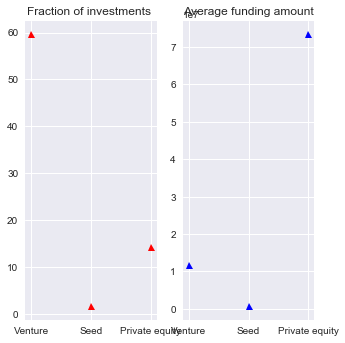

In [412]:
#PLOT 1


#ax=plt.gca()

x=['Venture','Seed','Private equity']
y=[venture['raised_amount_usd'].sum()*100/total_data, frac2['raised_amount_usd'].sum()*100/total_data,frac3['raised_amount_usd'].sum()*100/total_data]
y1=[venture['raised_amount_usd'].mean(),frac2['raised_amount_usd'].mean(),frac3['raised_amount_usd'].mean()]
#y
plt.figure(1)
plt.subplot(131)
plt.title("Fraction of investments ")
plt.plot(x,y,'r^')
#plt.show()

plt.subplot(132)
plt.title("Average funding amount")
plt.plot(x,y1,'b^')
plt.show()
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

In [417]:
sum_fund = master_frame.groupby(['funding_round_type'])['raised_amount_usd'].sum()
sum_fund

funding_round_type
angel                    4.659255e+09
convertible_note         2.102922e+09
debt_financing           1.138848e+11
equity_crowdfunding      6.604138e+08
grant                    9.134214e+09
non_equity_assistance    3.001782e+07
post_ipo_debt            2.564309e+10
post_ipo_equity          5.161061e+10
private_equity           1.419157e+11
product_crowdfunding     5.261686e+08
secondary_market         2.389489e+09
seed                     1.697794e+10
undisclosed              3.043862e+10
venture                  5.900447e+11
Name: raised_amount_usd, dtype: float64